# A Deep Dive into the Covid-19 Data of India

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('../datasets/covid_19_india.csv', index_col='Sno')

In [40]:
df.shape

(18110, 8)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18110 entries, 1 to 18110
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      18110 non-null  object
 1   Time                      18110 non-null  object
 2   State/UnionTerritory      18110 non-null  object
 3   ConfirmedIndianNational   18110 non-null  object
 4   ConfirmedForeignNational  18110 non-null  object
 5   Cured                     18110 non-null  int64 
 6   Deaths                    18110 non-null  int64 
 7   Confirmed                 18110 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [42]:
df.columns

Index(['Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

In [43]:
df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [44]:
df.tail()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


### Drop Unwanted Columns

In [45]:
df = df.drop(['Time'], axis=1)

### Show all State/UnionTerritory

In [46]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli',
       'Himanchal Pradesh', 'Karanataka'], dtype=object)

### Cumulative Sum

In [47]:
df['Total Cured'] = df['Cured'].cumsum()

In [48]:
df['Total Deaths'] = df['Deaths'].cumsum()

In [49]:
df['Total Confirmed'] = df['Confirmed'].cumsum()

In [50]:
df.head(10)

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cured,Total Deaths,Total Confirmed
Sno,,,,,,,,,,
1,2020-01-30,Kerala,1,0,0,0,1,0,0,1
2,2020-01-31,Kerala,1,0,0,0,1,0,0,2
3,2020-02-01,Kerala,2,0,0,0,2,0,0,4
4,2020-02-02,Kerala,3,0,0,0,3,0,0,7
5,2020-02-03,Kerala,3,0,0,0,3,0,0,10
6,2020-02-04,Kerala,3,0,0,0,3,0,0,13
7,2020-02-05,Kerala,3,0,0,0,3,0,0,16
8,2020-02-06,Kerala,3,0,0,0,3,0,0,19
9,2020-02-07,Kerala,3,0,0,0,3,0,0,22


### Working with date

In [51]:
df.Date.head()

Sno
1    2020-01-30
2    2020-01-31
3    2020-02-01
4    2020-02-02
5    2020-02-03
Name: Date, dtype: object

In [52]:
## Convert to DateTime type
df['Date'] = pd.to_datetime(df.Date)

In [53]:
df.Date.head()

Sno
1   2020-01-30
2   2020-01-31
3   2020-02-01
4   2020-02-02
5   2020-02-03
Name: Date, dtype: datetime64[ns]

In [54]:
df['year'] = pd.DatetimeIndex(df.Date).year
df['month'] = pd.DatetimeIndex(df.Date).month
df['weekday'] = pd.DatetimeIndex(df.Date).weekday

In [55]:
# Set Index as Date field
df.set_index('Date', inplace=True)

In [56]:
df

,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cured,Total Deaths,Total Confirmed,year,month,weekday
Date,,,,,,,,,,,,
2020-01-30,Kerala,1,0,0,0,1,0,0,1,2020,1,3
2020-01-31,Kerala,1,0,0,0,1,0,0,2,2020,1,4
2020-02-01,Kerala,2,0,0,0,2,0,0,4,2020,2,5
2020-02-02,Kerala,3,0,0,0,3,0,0,7,2020,2,6
2020-02-03,Kerala,3,0,0,0,3,0,0,10,2020,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,Telangana,-,-,638410,3831,650353,5042520967,73339837,5448011754,2021,8,2
2021-08-11,Tripura,-,-,77811,773,80660,5042598778,73340610,5448092414,2021,8,2
2021-08-11,Uttarakhand,-,-,334650,7368,342462,5042933428,73347978,5448434876,2021,8,2


## Task 1: Grouping Total Confirmed, Cured, and Death Covid cases by Year and Month.

In [57]:
df.groupby(['year', 'month'])[['Cured', 'Deaths', 'Confirmed', 'Total Cured']].head()

,Cured,Deaths,Confirmed,Total Cured
Date,,,,
2020-01-30,0,0,1,0
2020-01-31,0,0,1,0
2020-02-01,0,0,2,0
2020-02-02,0,0,3,0
2020-02-03,0,0,3,0
...,...,...,...,...
2021-08-01,7400,129,7537,4704937858
2021-08-01,1931618,13377,1966175,4706869476
2021-08-01,43939,229,48122,4706913415


In [58]:
df_year_month_metrics = df.groupby(['year', 'month'])[['Cured', 'Deaths', 'Confirmed', 'Total Cured']]

In [59]:
df_year_month_metrics.sum().reset_index()

,year,month,Cured,Deaths,Confirmed,Total Cured
0,2020,1,0,0,2,0
1,2020,2,0,0,86,0
2,2020,3,808,202,9687,119240
3,2020,4,75443,13270,422442,17460131
4,2020,5,1133341,89834,2938234,479097903
5,2020,6,5668946,319690,10558374,3690351225
6,2020,7,19980130,793511,31726501,16473089620
7,2020,8,58580895,1553468,80749620,55990237787
8,2020,9,118592934,2443374,149113758,145463951912
9,2020,10,198824412,3457615,226770312,322868889596


## Task 2: Grouping Total Confirmed, Cured, and Death Covid cases by Year, Month, and Week.

In [60]:
df_year_month_weekday_metrics = df.groupby(['year', 'month', 'weekday'])[['Cured', 'Deaths', 'Confirmed']]

In [61]:
df_year_month_weekday_metrics.sum()

Cured  Deaths  Confirmed
year month weekday                             
2020 1     3               0       0          1
           4               0       0          1
     2     0               0       0         12
           1               0       0         12
           2               0       0         12
...                      ...     ...        ...
2021 8     2        62154003  854936   63805643
           3        30974748  426290   31812114
           4        31015844  426754   31856757
           5        31055861  427371   31895385
           6        61920292  852213   63590279

[135 rows x 3 columns]

## Task 3: Grouping Total Confirmed, Cured, and Death Covid cases by State and Year.

In [62]:
df_state_year_metrics = df.groupby(['State/UnionTerritory', 'year'])[['Cured', 'Deaths', 'Confirmed']]

In [63]:
df_state_year_metrics.sum()

Cured   Deaths  Confirmed
State/UnionTerritory        year                               
Andaman and Nicobar Islands 2020     534731     7772     590838
                            2021    1313555    19364    1347660
Andhra Pradesh              2020   95094768   871178  104134066
                            2021  275331762  2068189  288298687
Arunachal Pradesh           2020    1442769     4488    1679508
...                                     ...      ...        ...
Uttar Pradesh               2021  236000065  3207094  249737133
Uttarakhand                 2020    6864570   121701    7960257
                            2021   41498171   864300   45180157
West Bengal                 2020   44508487   941478   50095209
                            2021  203006615  2905511  213012667

[79 rows x 3 columns]

## Task 4: Grouping Total Confirmed, Cured, and Death Covid cases by State, Year and Month.

In [64]:
df_state_year_month_metrics = df.groupby(['State/UnionTerritory', 'year', 'month'])[['Cured', 'Deaths', 'Confirmed']]

In [65]:
df_state_year_month_metrics.sum()

Cured  Deaths  Confirmed
State/UnionTerritory        year month                             
Andaman and Nicobar Islands 2020 3             0       0         36
                                 4           211       0        485
                                 5           969       0       1023
                                 6          1075       0       1352
                                 7          3809       8       6372
...                                          ...     ...        ...
West Bengal                 2021 4      18070114  317565   19707021
                                 5      30124636  410233   34376609
                                 6      42274197  505949   43685599
                                 7      45957100  556450   46964573
                                 8      16529748  200129   16847239

[641 rows x 3 columns]

## Task 5: Year-wise Covid report for the state of Kerala in the years 2020 and 2021.

In [66]:
df_kerala_year_metrics = df[df['State/UnionTerritory'] == 'Kerala'].groupby(['State/UnionTerritory', 'year'])[['Cured', 'Deaths', 'Confirmed']]

In [67]:
df_kerala_year_metrics.sum()

Cured   Deaths  Confirmed
State/UnionTerritory year                               
Kerala               2020   42951434   193376   51854118
                     2021  377222801  1694801  407051905

## Task 6: Month-wise Covid report for the state of Kerala in the years 2020 and 2021.

In [68]:
df_kerala_year_month_metrics = df[df['State/UnionTerritory'] == 'Kerala'].groupby(['State/UnionTerritory', 'year', 'month'])[['Cured', 'Deaths', 'Confirmed']]

In [69]:
df_kerala_year_month_metrics.sum()

Cured  Deaths  Confirmed
State/UnionTerritory year month                             
Kerala               2020 1             0       0          2
                          2             0       0         86
                          3           152       3       1690
                          4          5981      84      11496
                          5         15219     142      20734
                          6         37829     543      78399
                          7        170170    1226     345425
                          8        897214    5049    1399347
                          9       2528807   14165    3570633
                          10      6918689   33918    9763929
                          11     13288127   55658   15591120
                          12     19089246   82588   21071257
                     2021 1      23797725  105654   26008754
                          2      26076321  111157   27930632
                          3      32704316  136586   33851133
                          4      34165584  146326   37304263
                          5      53694213  203319   64564444
                          6      77832186  336103   82082292
                          7      92653655  464669   96916088
                          8      36298801  190987   38394299

### Pandas Simple Plot

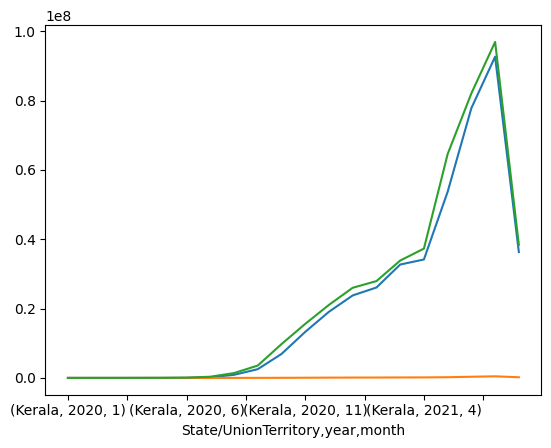

In [70]:
df_kerala_year_month_metrics.sum().Cured.plot();
df_kerala_year_month_metrics.sum().Deaths.plot();
df_kerala_year_month_metrics.sum().Confirmed.plot();

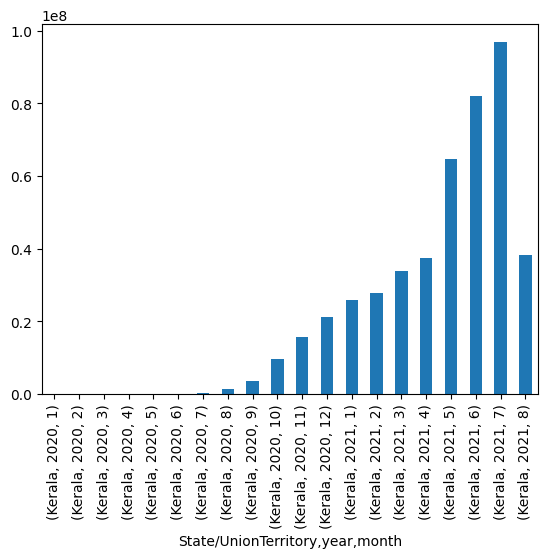

In [71]:
df_kerala_year_month_metrics.sum().Cured.plot(kind='bar');
df_kerala_year_month_metrics.sum().Deaths.plot(kind='bar');
df_kerala_year_month_metrics.sum().Confirmed.plot(kind='bar');